<a href="https://colab.research.google.com/github/surensnyper/class_machine_vision/blob/main/MachineVisionClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Camera Calibration

In [ ]:
n# https://www.youtube.com/watch?v=E3Lg4aZVCAU - Tutorial video of OpenCV
# https://www.youtube.com/watch?v=3h7wgR5fYik&t=760s - Another Tutorial
# https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html - OpenCV
import numpy as np
import cv2 as cv
import glob

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# img = "./5.jpg"
# img2 = cv.imread(img)
# cv2_imshow(img2)

In [ ]:
# chessboardSize = (9, 7)
# frameSize = (1440, 1080)

In [ ]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [ ]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# objp = np.zeros((chessboardSize[0]*chessboardSize[1],3), np.float32)
# objp[:,:2] = np.mgrid[0:chessboardSize[0], 0:chessboardSize[1]].T.reshape(-1,2)

In [ ]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('*.jpg')

In [ ]:
for fname in images:

    # print(fname)
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
#       cv.imshow('img', img)
#       cv.waitKey(500)
# cv.destroyAllWindows()

In [ ]:
################## CALIBRATION ###################
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, frameSize, None, None)

print("Camera Calibrated: ", ret)
print("\nCamera Matrix: \n", mtx)
print("\nDistortion Parameters: \n", dist)
print("\nRotation Vectors: \n", rvecs)
print("\nTranslation Vectors: \n", tvecs)

Camera Calibrated:  0.7792198996322665

Camera Matrix: 
 [[919.07664386   0.         480.21396913]
 [  0.         924.80151125 646.07406349]
 [  0.           0.           1.        ]]

Distortion Parameters: 
 [[ 2.43439483e-03  5.03258218e-01  6.31106186e-03 -1.08108075e-03
  -1.31973977e+00]]

Rotation Vectors: 
 [array([[-0.08408733],
       [-0.09864599],
       [ 3.13811342]]), array([[-0.52831046],
       [ 0.4514259 ],
       [ 3.05966441]]), array([[-0.07833323],
       [ 0.14497768],
       [-3.13038688]]), array([[ 0.02074186],
       [-0.47697786],
       [ 3.08039953]]), array([[-0.08319506],
       [ 0.1480352 ],
       [-3.13087952]]), array([[-0.16566147],
       [ 0.24940791],
       [-3.10841213]])]

Translation Vectors: 
 [array([[ 3.75523795],
       [ 0.96536826],
       [11.23573594]]), array([[ 3.97734711],
       [ 0.91119825],
       [11.6531275 ]]), array([[ 3.11339442],
       [ 1.23319237],
       [10.43669757]]), array([[ 3.48849384],
       [ 2.35492371],
 

In [ ]:
################## UNDISTORTION ###################
img = cv.imread('12.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [ ]:
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult1.png', dst)

True

In [ ]:
# img3 = "./calibresult.png"
# img4 = cv.imread(img3)
# cv2_imshow(img4)

In [ ]:
# Reprojection Error

mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.11684156503410041


# 2. Play with an Image

In [35]:
# import OpenCV library
import cv2
# import numpy
import numpy as np # an open source numerial Python library. We need this for matrix multiplication, SVD, and many more.   

from matplotlib import pyplot as plt # to display images, plot graphs, ...

# Shift+Enter to run each cell

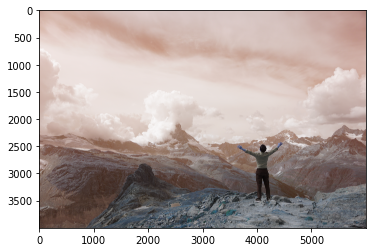

Well... something is worng.


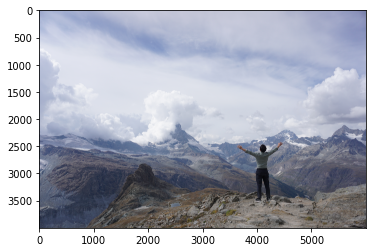

Now it looks good!
width: 6000, height: 4000, channels: 3


In [36]:
# read a gray image
#img = cv2.imread('Picture1.jpg', cmap='gray')
#h, w = img.shape # dimension of the image
#print(h, w)

# read a color image
img = cv2.imread('mountain1.jpg')

plt.imshow(img)
plt.show()

print("Well... something is worng.")


img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB color 

plt.imshow(img2)
plt.show()

print("Now it looks good!")

h, w, c = img.shape # h -> # of rows, w -> # of cols, c -> # of channels

print("width: %d, height: %d, channels: %d" %(w, h, c)) # This is how we represent formatted string in Python



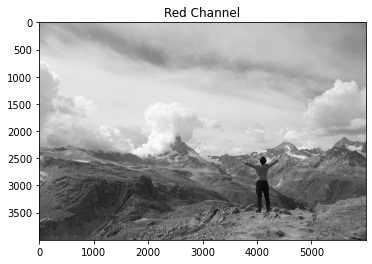

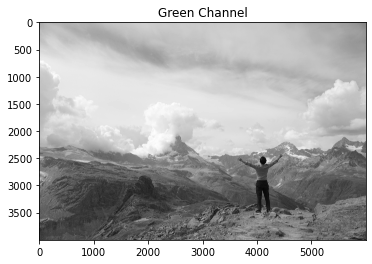

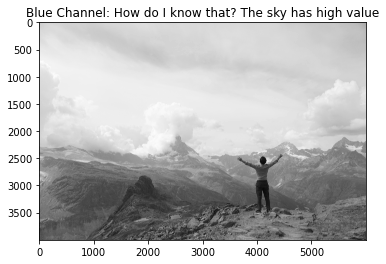

In [37]:
# In case you want to display each channel

plt.imshow(img2[:,:,0], cmap='gray')
plt.title('Red Channel')
plt.show()

plt.imshow(img2[:,:,1], cmap='gray')
plt.title('Green Channel')
plt.show()

plt.imshow(img2[:,:,2], cmap='gray')
plt.title('Blue Channel: How do I know that? The sky has high value')
plt.show()


In [38]:
# Some examples of indexing numpy arrays 

A = np.array([1, 2, 3, 4]) # 1D array
B = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]] ) # 2D array

print('Let\'s print A and B') 
print(A)
print(B)

Let's print A and B
[1 2 3 4]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [39]:
print('Let\'s print a subarray of A: A[0:1]')
print(A[0:1])
print('Wait, why does it print only one element?') # 0:1 starts from 0 but does not include 1 
print('Try this one, too: A[1:4]')
print(A[1:4]) # 1:4 is from 1 to 3. does not include 4

Let's print a subarray of A: A[0:1]
[1]
Wait, why does it print only one element?
Try this one, too: A[1:4]
[2 3 4]


In [40]:
print('What if I do not specify the second element? A[2:]')
print(A[2:])

print('What if I do not specify the first element? A[:3]')
print(A[:3])

print('What if I do not specify both? A[:]')
print(A[:])


print('Negative values? Let\'s try A[:-1]')
print(A[:-1])

print('Let\'s try A[:-2], too')
print(A[:-2])

What if I do not specify the second element? A[2:]
[3 4]
What if I do not specify the first element? A[:3]
[1 2 3]
What if I do not specify both? A[:]
[1 2 3 4]
Negative values? Let's try A[:-1]
[1 2 3]
Let's try A[:-2], too
[1 2]


In [41]:
print('In 2D case, the first index is for rows and the second represents columns? B[0:2, 0:3]')
print(B[0:2, 0:3])

print('This will give you the same result: B[:2, :3]')
print(B[:2, :3])

print('If you want 2nd and 3rd columns: B[:, [1, 2]] (note that the index begins with 0)')
print(B[:, [1, 2]])

print('Can I get 2nd and 4th columns: B[:, [1, 3]]')
print(B[:, [1, 3]])

print('How about this?: B[:, [-3, -1]]')
print(B[:, [-3, -1]])

print('How can I get the last row?')
print(B[-1:,:])

print('How can I get the last column?')
print(B[:,-1:])

print('last two columns?')
print(B[:,-2:])

In 2D case, the first index is for rows and the second represents columns? B[0:2, 0:3]
[[1 2 3]
 [5 6 7]]
This will give you the same result: B[:2, :3]
[[1 2 3]
 [5 6 7]]
If you want 2nd and 3rd columns: B[:, [1, 2]] (note that the index begins with 0)
[[ 2  3]
 [ 6  7]
 [10 11]]
Can I get 2nd and 4th columns: B[:, [1, 3]]
[[ 2  4]
 [ 6  8]
 [10 12]]
How about this?: B[:, [-3, -1]]
[[ 2  4]
 [ 6  8]
 [10 12]]
How can I get the last row?
[[ 9 10 11 12]]
How can I get the last column?
[[ 4]
 [ 8]
 [12]]
last two columns?
[[ 3  4]
 [ 7  8]
 [11 12]]


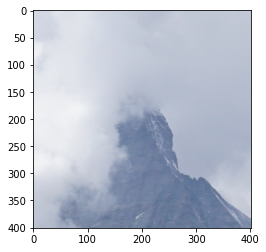

In [42]:
# Okay now. How can I get a patch of an image? Try this code

x = 2550;
y = 2100;

hwnd = 200; # half of the window size centered at (x, y); the width of the window is 2*hwnd+1


if x < w - hwnd and x > hwnd and y < h - hwnd and y > hwnd: # checks if the window is in the image
    # In Python, indentation is important. Make sure hit the space key four times
    patch1 = img2[y-hwnd:y+hwnd+1, x-hwnd:x+hwnd+1, :] 
    plt.imshow(patch1)

plt.show()


(401, 401)


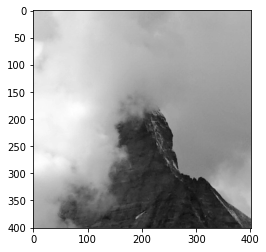

Let's remove the noise generated by JPEG compression

Here is the filter:

[[9.25454935e-05 1.97618764e-03 5.48259056e-03 1.97618764e-03
  9.25454935e-05]
 [1.97618764e-03 4.21988954e-02 1.17073531e-01 4.21988954e-02
  1.97618764e-03]
 [5.48259056e-03 1.17073531e-01 3.24800248e-01 1.17073531e-01
  5.48259056e-03]
 [1.97618764e-03 4.21988954e-02 1.17073531e-01 4.21988954e-02
  1.97618764e-03]
 [9.25454935e-05 1.97618764e-03 5.48259056e-03 1.97618764e-03
  9.25454935e-05]]


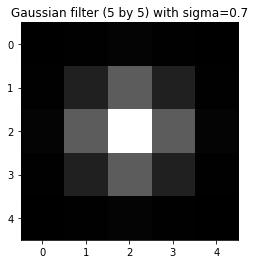

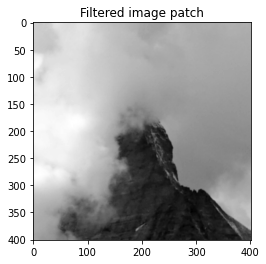

In [43]:
patch1 = cv2.cvtColor(img2[y-hwnd:y+hwnd+1, x-hwnd:x+hwnd+1, :], cv2.COLOR_RGB2GRAY)
patch1 = patch1/255 # 0-255 to 0.0 to 1.0
print(patch1.shape)

plt.imshow(patch1, cmap = 'gray')
plt.show()

# Smoothing 
print('Let\'s remove the noise generated by JPEG compression\n')
patch1 = cv2.GaussianBlur(patch1,(5,5),0.7)

kernel = cv2.getGaussianKernel(5, 0.7)
kernel = np.dot(kernel, kernel.T)

print('Here is the filter:\n')
print(kernel)

plt.imshow(kernel, cmap = 'gray')
plt.title('Gaussian filter (5 by 5) with sigma=0.7')
plt.show()

plt.imshow(patch1, cmap = 'gray')
plt.title('Filtered image patch')
plt.show()

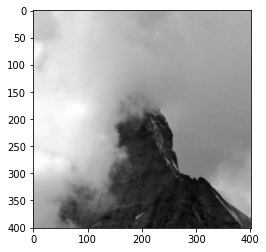

(401, 400)


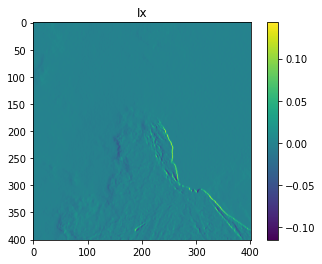

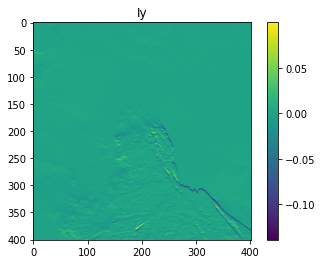

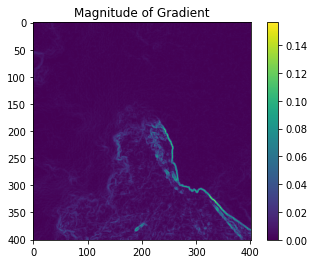

In [44]:
# Image gradient of a patch
plt.imshow(patch1, cmap = 'gray')
plt.show()


Ix = patch1[:,1:] - patch1[:,:-1]
print(Ix.shape)

# let's append the last column 
Ix = np.concatenate((Ix, Ix[:,-1:]), axis=1) # axis=1 concat columns  


# an array index starts with 0. 
Iy = patch1[1:, :] - patch1[:-1, :]
# repeat the last row 

Iy = np.concatenate((Iy, Iy[-1:,:]), axis=0) # axis=0 to add more rows 


plt.imshow(Ix)
plt.title('Ix')
plt.colorbar()
plt.show()

plt.imshow(Iy)
plt.title('Iy')
plt.colorbar()
plt.show()


# Magnitude: sqrt(Ix^2 + Iy^2)

Im = np.sqrt(Ix * Ix + Iy * Iy)

plt.imshow(Im)
plt.title('Magnitude of Gradient')
plt.colorbar()
plt.show()

# 3. Fast Corner

## 3.1. Detect corner with delta = 5

In [22]:
# import OpenCV library
import cv2
# import numpy
import numpy as np # an open source numerial Python library   
from matplotlib import pyplot as plt # to display images, plot graphs, ...


In [32]:
def DetectFASTCorner(img, delta=5):
    
    img = cv2.GaussianBlur(img,(5,5),0.787)
    offset = np.array([[0, -3], [1, -3], [2, -2], [3, -1], [3, 0], [3, 1], \
                       [2, 2], [1, 3], [0, 3], [-1, 3], [-2, 2], [-3, 1], [-3, 0], [-3, -1], [-2, -2], [-1, -3]])

    b = 4; # b is greater than equal to 4

    # get pixel values for 16 points 
    v0_t = img[b:-b, b:-b].astype(int)+delta
    v0_b = img[b:-b, b:-b].astype(int)-delta
    v1 = img[b+offset[0,1]:offset[0,1]-b,b+offset[0,0]:offset[0,0]-b].astype(int)
    v2 = img[b+offset[1,1]:offset[1,1]-b,b+offset[1,0]:offset[1,0]-b].astype(int)
    v3 = img[b+offset[2,1]:offset[2,1]-b,b+offset[2,0]:offset[2,0]-b].astype(int)
    v4 = img[b+offset[3,1]:offset[3,1]-b,b+offset[3,0]:offset[3,0]-b].astype(int)
    v5 = img[b+offset[4,1]:offset[4,1]-b,b+offset[4,0]:offset[4,0]-b].astype(int)
    v6 = img[b+offset[5,1]:offset[5,1]-b,b+offset[5,0]:offset[5,0]-b].astype(int)
    v7 = img[b+offset[6,1]:offset[6,1]-b,b+offset[6,0]:offset[6,0]-b].astype(int)
    v8 = img[b+offset[7,1]:offset[7,1]-b,b+offset[7,0]:offset[7,0]-b].astype(int)
    v9 = img[b+offset[8,1]:offset[8,1]-b,b+offset[8,0]:offset[8,0]-b].astype(int)
    v10 = img[b+offset[9,1]:offset[9,1]-b,b+offset[9,0]:offset[9,0]-b].astype(int)
    v11 = img[b+offset[10,1]:offset[10,1]-b,b+offset[10,0]:offset[10,0]-b].astype(int)
    v12 = img[b+offset[11,1]:offset[11,1]-b,b+offset[11,0]:offset[11,0]-b].astype(int)
    v13 = img[b+offset[12,1]:offset[12,1]-b,b+offset[12,0]:offset[12,0]-b].astype(int)
    v14 = img[b+offset[13,1]:offset[13,1]-b,b+offset[13,0]:offset[13,0]-b].astype(int)
    v15 = img[b+offset[14,1]:offset[14,1]-b,b+offset[14,0]:offset[14,0]-b].astype(int)
    v16 = img[b+offset[15,1]:offset[15,1]-b,b+offset[15,0]:offset[15,0]-b].astype(int)

    # corner type 1 
    b_1_and_9 = np.logical_and(v0_t < v1, v0_t < v9)
    b_5_or_13 = np.logical_or(v0_t < v5, v0_t < v13)

    b_5_and_13 = np.logical_and(v0_t < v5, v0_t < v13)  
    b_1_or_9 = np.logical_or(v0_t < v1, v0_t < v9)

    b_fast_test1 = np.logical_or(np.logical_and(b_1_or_9, b_5_and_13), np.logical_and(b_1_and_9, b_5_or_13))

    v0_t_tested1 = v0_t[b_fast_test1]

    b1 = v1[b_fast_test1] > v0_t_tested1
    b2 = v2[b_fast_test1] > v0_t_tested1
    b3 = v3[b_fast_test1] > v0_t_tested1
    b4 = v4[b_fast_test1] > v0_t_tested1
    b5 = v5[b_fast_test1] > v0_t_tested1
    b6 = v6[b_fast_test1] > v0_t_tested1
    b7 = v7[b_fast_test1] > v0_t_tested1
    b8 = v8[b_fast_test1] > v0_t_tested1
    b9 = v9[b_fast_test1] > v0_t_tested1
    b10 = v10[b_fast_test1] > v0_t_tested1
    b11 = v11[b_fast_test1] > v0_t_tested1
    b12 = v12[b_fast_test1] > v0_t_tested1
    b13 = v13[b_fast_test1] > v0_t_tested1
    b14 = v14[b_fast_test1] > v0_t_tested1
    b15 = v15[b_fast_test1] > v0_t_tested1
    b16 = v15[b_fast_test1] > v0_t_tested1

    diff1 = v1[b_fast_test1] - v0_t_tested1
    diff2 = v2[b_fast_test1] - v0_t_tested1
    diff3 = v3[b_fast_test1] - v0_t_tested1
    diff4 = v4[b_fast_test1] - v0_t_tested1 
    diff5 = v5[b_fast_test1] - v0_t_tested1 
    diff6 = v6[b_fast_test1] - v0_t_tested1 
    diff7 = v7[b_fast_test1] - v0_t_tested1 
    diff8 = v8[b_fast_test1] - v0_t_tested1 
    diff9 = v9[b_fast_test1] - v0_t_tested1 
    diff10 = v10[b_fast_test1] - v0_t_tested1
    diff11 = v11[b_fast_test1] - v0_t_tested1 
    diff12 = v12[b_fast_test1] - v0_t_tested1 
    diff13 = v13[b_fast_test1] - v0_t_tested1 
    diff14 = v14[b_fast_test1] - v0_t_tested1 
    diff15 = v15[b_fast_test1] - v0_t_tested1 
    diff16 = v16[b_fast_test1] - v0_t_tested1

    c_res1 = diff1*(diff1>0).astype(int)+diff2*(diff2>0).astype(int)+diff3*(diff3>0).astype(int)+diff4*(diff4>0).astype(int) \
            + diff5*(diff5>0).astype(int)+diff6*(diff6>0).astype(int)+diff7*(diff7>0).astype(int)+diff8*(diff8>0).astype(int) \
            + diff9*(diff9>0).astype(int)+diff10*(diff10>0).astype(int)+diff11*(diff11>0).astype(int)+diff12*(diff12>0).astype(int) \
            + diff13*(diff13>0).astype(int)+diff14*(diff14>0).astype(int)+diff15*(diff15>0).astype(int)+diff16*(diff16>0).astype(int) 

    b_1to12 = ((((((((((((b1.astype(int)+b2.astype(int))*b2.astype(int))+b3.astype(int))*b3.astype(int) \
                       +b4.astype(int))*b4.astype(int)+b5.astype(int))*b5.astype(int)+b6.astype(int))*b6.astype(int) \
                    +b7.astype(int))*b7.astype(int)+b8.astype(int))*b8.astype(int)+b9.astype(int))*b9.astype(int) \
                 +b10.astype(int))*b10.astype(int)+b11.astype(int))*b11.astype(int)+b12.astype(int))*b12.astype(int)

    b_2to13 = (b_1to12+b13.astype(int))*b13.astype(int)
    b_3to14 = (b_2to13+b14.astype(int))*b14.astype(int)
    b_4to15 = (b_3to14+b15.astype(int))*b15.astype(int)
    b_5to16 = (b_4to15+b16.astype(int))*b16.astype(int)
    b_6to1 = (b_5to16+b1.astype(int))*b1.astype(int)
    b_7to2 = (b_6to1+b2.astype(int))*b2.astype(int)
    b_8to3 = (b_7to2+b3.astype(int))*b3.astype(int)
    b_9to4 = (b_8to3+b4.astype(int))*b4.astype(int)
    b_10to5 = (b_9to4+b5.astype(int))*b5.astype(int)
    b_11to6 = (b_10to5+b6.astype(int))*b6.astype(int)
    b_12to7 = (b_11to6+b7.astype(int))*b7.astype(int)
    b_13to8 = (b_12to7+b8.astype(int))*b8.astype(int)
    b_14to9 = (b_13to8+b9.astype(int))*b9.astype(int)
    b_15to10 = (b_14to9+b10.astype(int))*b10.astype(int)
    b_16to11 = (b_15to10+b11.astype(int))*b11.astype(int)

    b_corner1 = np.logical_or(np.logical_or(b_1to12 >= 12, b_2to13 >= 12), np.logical_or(b_3to14 >= 12, b_4to15 >= 12))
    b_corner1 = np.logical_or(np.logical_or(b_corner1, b_5to16 >= 12), np.logical_or(b_6to1 >= 12, b_7to2 >= 12))
    b_corner1 = np.logical_or(np.logical_or(b_corner1, b_8to3 >= 12), np.logical_or(b_9to4 >= 12, b_10to5 >= 12))
    b_corner1 = np.logical_or(np.logical_or(b_corner1, b_11to6 >= 12), np.logical_or(b_12to7 >= 12, b_13to8 >= 12))
    b_corner1 = np.logical_or(np.logical_or(b_corner1, b_14to9 >= 12), np.logical_or(b_15to10 >= 12, b_16to11 >= 12))


    # corner type 2
    b_1_and_9 = np.logical_and(v0_b > v1, v0_b > v9)
    b_5_or_13 = np.logical_or(v0_b > v5, v0_b > v13)

    b_5_and_13 = np.logical_and(v0_b > v5, v0_b > v13)  
    b_1_or_9 = np.logical_or(v0_b > v1, v0_b > v9)

    b_fast_test2 = np.logical_or(np.logical_and(b_1_or_9, b_5_and_13), np.logical_and(b_1_and_9, b_5_or_13))

    v0_b_tested2 = v0_b[b_fast_test2]

    b1 = v1[b_fast_test2] < v0_b_tested2
    b2 = v2[b_fast_test2] < v0_b_tested2
    b3 = v3[b_fast_test2] < v0_b_tested2
    b4 = v4[b_fast_test2] < v0_b_tested2
    b5 = v5[b_fast_test2] < v0_b_tested2
    b6 = v6[b_fast_test2] < v0_b_tested2
    b7 = v7[b_fast_test2] < v0_b_tested2
    b8 = v8[b_fast_test2] < v0_b_tested2
    b9 = v9[b_fast_test2] < v0_b_tested2
    b10 = v10[b_fast_test2] < v0_b_tested2
    b11 = v11[b_fast_test2] < v0_b_tested2
    b12 = v12[b_fast_test2] < v0_b_tested2
    b13 = v13[b_fast_test2] < v0_b_tested2
    b14 = v14[b_fast_test2] < v0_b_tested2
    b15 = v15[b_fast_test2] < v0_b_tested2
    b16 = v15[b_fast_test2] < v0_b_tested2

    diff1 = v0_b_tested2 - v1[b_fast_test2]
    diff2 = v0_b_tested2 - v2[b_fast_test2]
    diff3 = v0_b_tested2 - v3[b_fast_test2]
    diff4 = v0_b_tested2 - v4[b_fast_test2]
    diff5 = v0_b_tested2 - v5[b_fast_test2]
    diff6 = v0_b_tested2 - v6[b_fast_test2]
    diff7 = v0_b_tested2 - v7[b_fast_test2]
    diff8 = v0_b_tested2 - v8[b_fast_test2]
    diff9 = v0_b_tested2 - v9[b_fast_test2]
    diff10 = v0_b_tested2 - v10[b_fast_test2]
    diff11 = v0_b_tested2 - v11[b_fast_test2]
    diff12 = v0_b_tested2 - v12[b_fast_test2]
    diff13 = v0_b_tested2 - v13[b_fast_test2]
    diff14 = v0_b_tested2 - v14[b_fast_test2]
    diff15 = v0_b_tested2 - v15[b_fast_test2]
    diff16 = v0_b_tested2 - v16[b_fast_test2]

    c_res2 = diff1*(diff1>0).astype(int) + diff2*(diff2>0).astype(int)+diff3*(diff3>0).astype(int)+diff4*(diff4>0).astype(int) \
            + diff5*(diff5>0).astype(int)+diff6*(diff6>0).astype(int)+diff7*(diff7>0).astype(int)+diff8*(diff8>0).astype(int) \
            + diff9*(diff9>0).astype(int)+diff10*(diff10>0).astype(int)+diff11*(diff11>0).astype(int)+diff12*(diff12>0).astype(int) \
            + diff13*(diff13>0).astype(int)+diff14*(diff14>0).astype(int)+diff15*(diff15>0).astype(int)+diff16*(diff16>0).astype(int) 

    b_1to12 = ((((((((((((b1.astype(int)+b2.astype(int))*b2.astype(int))+b3.astype(int))*b3.astype(int) \
                       +b4.astype(int))*b4.astype(int)+b5.astype(int))*b5.astype(int)+b6.astype(int))*b6.astype(int) \
                    +b7.astype(int))*b7.astype(int)+b8.astype(int))*b8.astype(int)+b9.astype(int))*b9.astype(int) \
                 +b10.astype(int))*b10.astype(int)+b11.astype(int))*b11.astype(int)+b12.astype(int))*b12.astype(int)

    b_2to13 = (b_1to12+b13.astype(int))*b13.astype(int)
    b_3to14 = (b_2to13+b14.astype(int))*b14.astype(int)
    b_4to15 = (b_3to14+b15.astype(int))*b15.astype(int)
    b_5to16 = (b_4to15+b16.astype(int))*b16.astype(int)
    b_6to1 = (b_5to16+b1.astype(int))*b1.astype(int)
    b_7to2 = (b_6to1+b2.astype(int))*b2.astype(int)
    b_8to3 = (b_7to2+b3.astype(int))*b3.astype(int)
    b_9to4 = (b_8to3+b4.astype(int))*b4.astype(int)
    b_10to5 = (b_9to4+b5.astype(int))*b5.astype(int)
    b_11to6 = (b_10to5+b6.astype(int))*b6.astype(int)
    b_12to7 = (b_11to6+b7.astype(int))*b7.astype(int)
    b_13to8 = (b_12to7+b8.astype(int))*b8.astype(int)
    b_14to9 = (b_13to8+b9.astype(int))*b9.astype(int)
    b_15to10 = (b_14to9+b10.astype(int))*b10.astype(int)
    b_16to11 = (b_15to10+b11.astype(int))*b11.astype(int)

    b_corner2 = np.logical_or(np.logical_or(b_1to12 >= 12, b_2to13 >= 12), np.logical_or(b_3to14 >= 12, b_4to15 >= 12))
    b_corner2 = np.logical_or(np.logical_or(b_corner2, b_5to16 >= 12), np.logical_or(b_6to1 >= 12, b_7to2 >= 12))
    b_corner2 = np.logical_or(np.logical_or(b_corner2, b_8to3 >= 12), np.logical_or(b_9to4 >= 12, b_10to5 >= 12))
    b_corner2 = np.logical_or(np.logical_or(b_corner2, b_11to6 >= 12), np.logical_or(b_12to7 >= 12, b_13to8 >= 12))
    b_corner2 = np.logical_or(np.logical_or(b_corner2, b_14to9 >= 12), np.logical_or(b_15to10 >= 12, b_16to11 >= 12))

    #print(c_res1[b_corner1].shape)
    #print(c_res2[b_corner2].shape)

    xy = np.mgrid[4:img.shape[0]-4, 4:img.shape[1]-4]
    xx = xy[1]
    yy = xy[0]

    x_fast1 = xx[b_fast_test1]
    x_corner1 = x_fast1[b_corner1]
    y_fast1 = yy[b_fast_test1]
    y_corner1 = y_fast1[b_corner1]

    x_fast2 = xx[b_fast_test2]
    x_corner2 = x_fast2[b_corner2]
    y_fast2 = yy[b_fast_test2]
    y_corner2 = y_fast2[b_corner2]

    x_corner = np.hstack((x_corner1, x_corner2))
    y_corner = np.hstack((y_corner1, y_corner2))
    c_res = np.hstack((c_res1[b_corner1], c_res2[b_corner2]))

    
    
    # non maximum suppresion 
    result = np.zeros(img.shape[0:2], dtype=int)
    result[y_corner, x_corner] = c_res

    b_non_max = np.amax(np.array([np.pad(result, ((0, 2), (0, 2)), 'constant'), np.pad(result, ((0, 2), (1, 1)), 'constant'), \
              np.pad(result, ((0, 2), (2, 0)), 'constant'), np.pad(result, ((1, 1), (0, 2)), 'constant'), \
              np.pad(result, ((1, 1), (2, 0)), 'constant'), np.pad(result, ((2, 0), (0, 2)), 'constant'), \
              np.pad(result, ((2, 0), (1, 1)), 'constant'), np.pad(result, ((2, 0), (2, 0)), 'constant')]), axis=0) > np.pad(result, ((1, 1), (1, 1)), 'constant')

    b_non_max = b_non_max[1:-1, 1:-1]

    result[b_non_max] = 0

    xy = np.mgrid[0:img.shape[0], 0:img.shape[1]]
    xx = xy[1]
    yy = xy[0]

    b_corner_nms = result > 200
    x_corner = xx[b_corner_nms]
    y_corner = yy[b_corner_nms]
    c_res = result[b_corner_nms]

    return np.vstack((x_corner, y_corner)).T, c_res

In [45]:
img = cv2.cvtColor(cv2.imread('mountain1.jpg'), cv2.COLOR_BGR2GRAY)
corners, V = DetectFASTCorner(img, 20)
print(corners.shape)

(2834, 2)


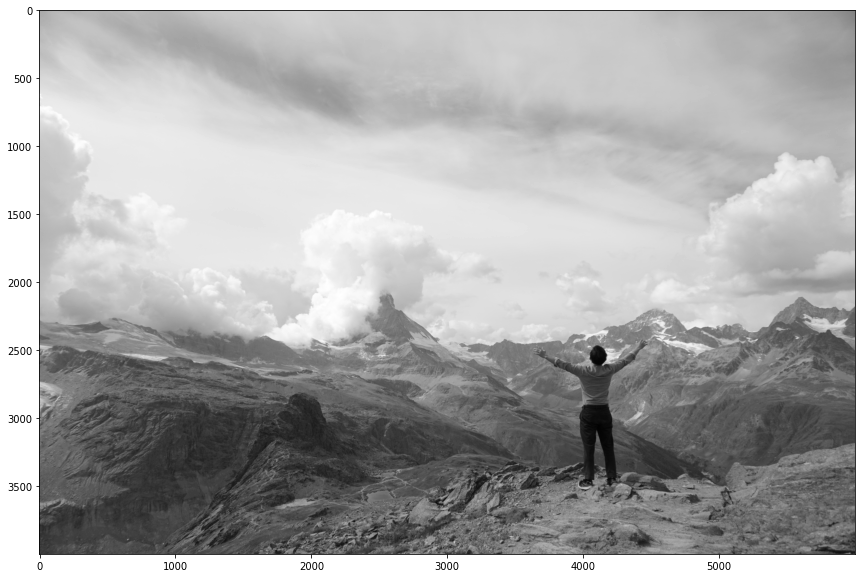

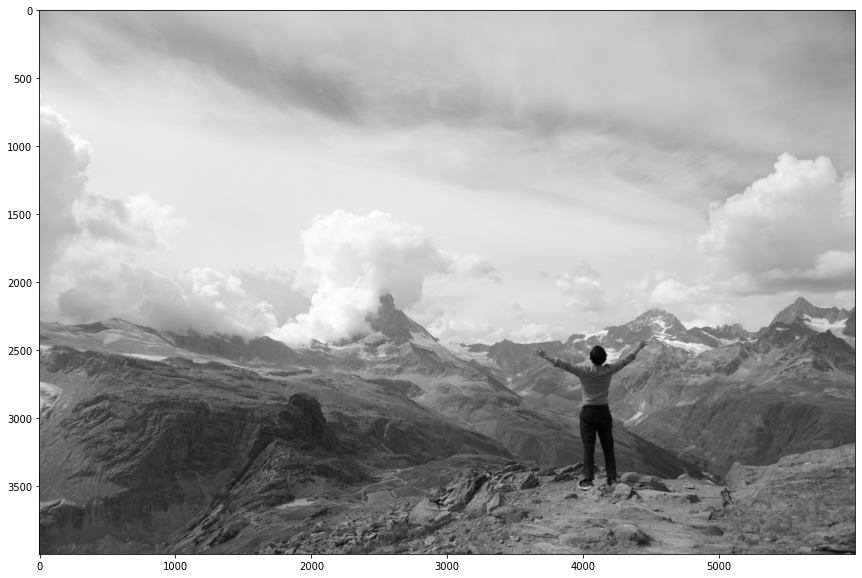

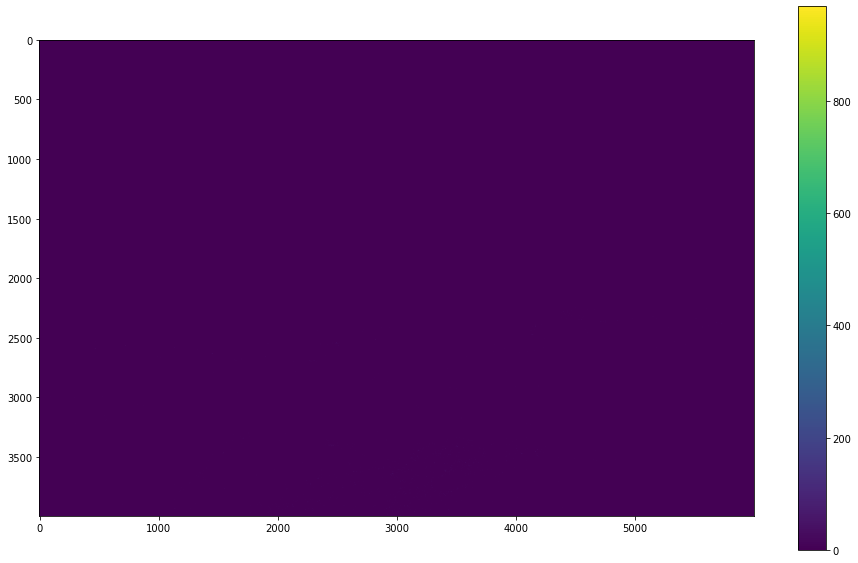

In [46]:
# visualize the corners

corner_map = np.zeros(img.shape[0:2], dtype=int)
corner_map[corners[:,1], corners[:,0]] = V

blur = cv2.GaussianBlur(img,(5,5),0.787)

plt.figure(figsize=(16,10))
plt.imshow(blur, cmap='gray')
plt.show()

blur = cv2.GaussianBlur(img,(5,5),1.414)

plt.figure(figsize=(16,10))
plt.imshow(blur, cmap='gray')
plt.show()


plt.figure(figsize=(16,10))
plt.imshow(corner_map)
plt.colorbar()
plt.show()


In [47]:
def ExtractDescriptors(img, corners, delta = 10):

    # extract descriptors
    img_s = cv2.GaussianBlur(img,(5,5), 1.414)
    img = cv2.GaussianBlur(img,(5,5), 0.787)

    
    v0 = img[corners[:,1], corners[:,0]].astype(int) # pixel values of the corner points
    v0_t = v0 + delta
    v0_b = v0 - delta
    v1 = img[corners[:,1]-1, corners[:,0]-1].astype(int)
    v2 = img[corners[:,1]-1, corners[:,0]].astype(int)
    v3 = img[corners[:,1]-1, corners[:,0]+1].astype(int)
    v4 = img[corners[:,1], corners[:,0]-1].astype(int)
    v5 = img[corners[:,1], corners[:,0]+1].astype(int)
    v6 = img[corners[:,1]+1, corners[:,0]-1].astype(int)
    v7 = img[corners[:,1]+1, corners[:,0]].astype(int)
    v8 = img[corners[:,1]+1, corners[:,0]+1].astype(int)

    v0_s = img_s[corners[:,1], corners[:,0]].astype(int)
    v9 = img_s[corners[:,1]-2, corners[:,0]-2].astype(int)
    v10 = img_s[corners[:,1]-2, corners[:,0]].astype(int)
    v11 = img_s[corners[:,1]-2, corners[:,0]+2].astype(int)
    v12 = img_s[corners[:,1], corners[:,0]-2].astype(int)
    v13 = img_s[corners[:,1], corners[:,0]+2].astype(int)
    v14 = img_s[corners[:,1]+2, corners[:,0]-2].astype(int)
    v15 = img_s[corners[:,1]+2, corners[:,0]].astype(int)
    v16 = img_s[corners[:,1]+2, corners[:,0]+2].astype(int)

    v17 = img_s[corners[:,1]-3, corners[:,0]-3].astype(int)
    v18 = img_s[corners[:,1]-3, corners[:,0]].astype(int)
    v19 = img_s[corners[:,1]-3, corners[:,0]+3].astype(int)
    v20 = img_s[corners[:,1], corners[:,0]-3].astype(int)
    v21 = img_s[corners[:,1], corners[:,0]+3].astype(int)
    v22 = img_s[corners[:,1]+3, corners[:,0]-3].astype(int)
    v23 = img_s[corners[:,1]+3, corners[:,0]].astype(int)
    v24 = img_s[corners[:,1]+3, corners[:,0]+3].astype(int)

    b1 = (v1 > v0_b).astype(np.int8) + (v1 > v0_t).astype(np.int8)
    b2 = (v2 > v0_b).astype(np.int8) + (v2 > v0_t).astype(np.int8)
    b3 = (v3 > v0_b).astype(np.int8) + (v3 > v0_t).astype(np.int8)
    b4 = (v4 > v0_b).astype(np.int8) + (v4 > v0_t).astype(np.int8)
    b5 = (v5 > v0_b).astype(np.int8) + (v5 > v0_t).astype(np.int8)
    b6 = (v6 > v0_b).astype(np.int8) + (v6 > v0_t).astype(np.int8)
    b7 = (v7 > v0_b).astype(np.int8) + (v7 > v0_t).astype(np.int8)
    b8 = (v8 > v0_b).astype(np.int8) + (v8 > v0_t).astype(np.int8)
    b9 = (v9 > v0_s - delta).astype(np.int8) + (v9 > v0_s + delta).astype(np.int8)
    b10 = (v10 > v0_s - delta).astype(np.int8) + (v10 > v0_s + delta).astype(np.int8)
    b11 = (v11 > v0_s - delta).astype(np.int8) + (v11 > v0_s + delta).astype(np.int8)
    b12 = (v12 > v0_s - delta).astype(np.int8) + (v12 > v0_s + delta).astype(np.int8)
    b13 = (v13 > v0_s - delta).astype(np.int8) + (v13 > v0_s + delta).astype(np.int8)
    b14 = (v14 > v0_s - delta).astype(np.int8) + (v14 > v0_s + delta).astype(np.int8)
    b15 = (v15 > v0_s - delta).astype(np.int8) + (v15 > v0_s + delta).astype(np.int8)
    b16 = (v16 > v0_s - delta).astype(np.int8) + (v16 > v0_s + delta).astype(np.int8)
    b17 = (v17 > v0_s - delta).astype(np.int8) + (v17 > v0_s + delta).astype(np.int8)
    b18 = (v18 > v0_s - delta).astype(np.int8) + (v18 > v0_s + delta).astype(np.int8)
    b19 = (v19 > v0_s - delta).astype(np.int8) + (v19 > v0_s + delta).astype(np.int8)
    b20 = (v20 > v0_s - delta).astype(np.int8) + (v20 > v0_s + delta).astype(np.int8)
    b21 = (v21 > v0_s - delta).astype(np.int8) + (v21 > v0_s + delta).astype(np.int8)
    b22 = (v22 > v0_s - delta).astype(np.int8) + (v22 > v0_s + delta).astype(np.int8)
    b23 = (v23 > v0_s - delta).astype(np.int8) + (v23 > v0_s + delta).astype(np.int8)
    b24 = (v24 > v0_s - delta).astype(np.int8) + (v24 > v0_s + delta).astype(np.int8)

    desc = np.vstack((b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16, b17, b18, b19, b20, b21, b22, b23, b24)).T

    return desc

In [48]:
img2 = cv2.cvtColor(cv2.imread('mountain2.jpg'), cv2.COLOR_BGR2GRAY)
corners2, V2 = DetectFASTCorner(img2, 20)
print(corners2.shape)
print(corners.shape)

desc1 = ExtractDescriptors(img, corners)
desc2 = ExtractDescriptors(img2, corners2)


(3472, 2)
(2834, 2)


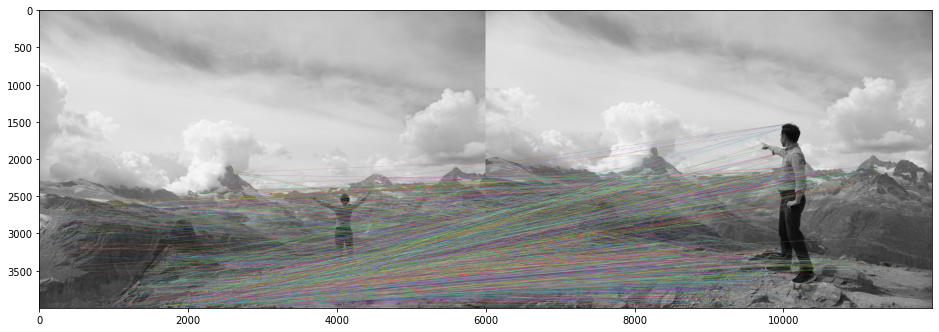

In [49]:
# Matching 

matching1to2 = np.zeros((desc1.shape[0],2), dtype=int)
matchingCost = np.zeros(desc1.shape[0], dtype=int)
max_val = 2*24
for i in range(0, desc1.shape[0]):
        
    dist = np.sum(np.absolute(desc2 - desc1[i,:]), axis = 1)
    
    #print('min cost: %d, matches: %d' %(matchingCost[i],np.ravel(min_idx).shape[0]))
    min_idx = np.where(dist == np.amin(dist))
    matchingCost[i] = dist[np.ravel(min_idx)[0]]
    
    dist[np.ravel(min_idx)[0]] = max_val
    min_idx2 = np.where(dist == np.amin(dist))
    matching1to2[i,0] = np.ravel(min_idx)[0] # minimum
    matching1to2[i,1] = np.ravel(min_idx2)[0] # 2nd minimum
    
    # implement: ratio matching, symmetic constraint, and thresholding by matching cost
    
    
    
# display correspondences 
    
keypoints1 = []
for i in range(0, corners.shape[0]):
    keypoints1.append(cv2.KeyPoint(corners[i,0], corners[i,1], 1))
    
keypoints2 = []
for i in range(0, corners2.shape[0]):
    keypoints2.append(cv2.KeyPoint(corners2[i,0], corners2[i,1], 1))
    
matches_draw = []
for i in range(0, matching1to2.shape[0]):
    matches_draw.append(cv2.DMatch(i, matching1to2[i,0], matchingCost[i]))

match_img = cv2.drawMatches(
    img, keypoints1,
    img2, keypoints2,
    matches_draw[0:-1], outImg=None)
    

plt.figure(figsize=(16,10))
plt.imshow(match_img)    
plt.show()


In [50]:
def FindHomography(pts1, pts2):
    
    n = pts1.shape[0]
    A = np.zeros((0, 9), dtype=float)
    for i in range(0, n):
        
        x = pts1[i, 0]
        y = pts1[i, 1]
        
        xp = pts2[i, 0]
        yp = pts2[i, 1]
        
        a1 = np.array([[-x, -y, -1, 0.0, 0.0, 0.0, xp*x, xp*y, xp], [0, 0, 0, -x, -y, -1, yp*x, yp*y, yp]])
        A = np.vstack((A, a1))
    
    #print(A)
    u, d, vh = np.linalg.svd(A)
    
    #print(v)
    H = vh[-1]
    H = H/H[-1]
    
    return H
    

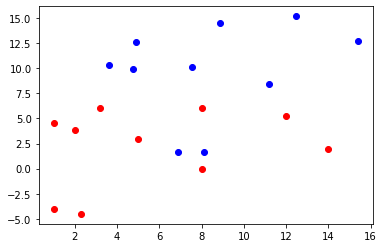

The transform applied to the 3D points
[[ 0.83149158 -0.38268343  4.5       ]
 [ 0.38268343  1.01626749  5.3       ]
 [ 0.          0.          1.        ]]
The estimated transform
[ 8.30321372e-01 -3.77342253e-01  4.50791039e+00  3.81136053e-01
  1.01879619e+00  5.32296145e+00 -2.03063293e-04  7.90877645e-04
  1.00000000e+00]


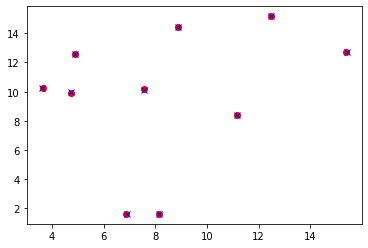

In [51]:
# test the funtion FindHomography

# the homography matrix 
scale_x = 0.9
scale_y = 1.1
tx = 4.5
ty = 5.3
true_H = np.array([[scale_x*np.cos(np.pi/8), -np.sin(np.pi/8), tx], [np.sin(np.pi/8), scale_y*np.cos(np.pi/8), ty], [0, 0, 1]])

# input points
pts1 = np.array([[1, -4], [1, 4.5], [2, 3.8], [2.3, -4.5], [5, 2.9], [8, 6], [12, 5.2], [14, 2], [3.2, 6.0], [8, 0.0]])

# transformed points, noise added
uvw = np.matmul(true_H, np.vstack(((pts1 + (np.random.random(pts1.shape) -0.5)*0.1).T, np.ones((1, pts1.shape[0])))))
pts2 = np.divide(uvw, uvw[-1,:])[0:2,:].T

plt.plot(pts1[:,0],pts1[:,1], 'ro')
plt.plot(pts2[:,0],pts2[:,1], 'bo')
plt.show()


H = FindHomography(pts1, pts2)

uvw = np.matmul(np.reshape(H, (3,3)), np.vstack((pts1.T, np.ones((1, pts1.shape[0])))))
pts2p = np.divide(uvw, uvw[-1,:])[0:2,:].T

print('The transform applied to the 3D points')
print(true_H)
print('The estimated transform')
print(H)


plt.plot(pts2p[:,0],pts2p[:,1], 'ro')
plt.plot(pts2[:,0],pts2[:,1], 'bx')
plt.show()


## 3.2. Detect corner with delta = 10

In [52]:
# import OpenCV library
import cv2
# import numpy
import numpy as np # an open source numerial Python library   
from matplotlib import pyplot as plt # to display images, plot graphs, ...


In [53]:
def DetectFASTCorner(img, delta=10):
    
    img = cv2.GaussianBlur(img,(5,5),0.787)
    offset = np.array([[0, -3], [1, -3], [2, -2], [3, -1], [3, 0], [3, 1], \
                       [2, 2], [1, 3], [0, 3], [-1, 3], [-2, 2], [-3, 1], [-3, 0], [-3, -1], [-2, -2], [-1, -3]])

    b = 4; # b is greater than equal to 4

    # get pixel values for 16 points 
    v0_t = img[b:-b, b:-b].astype(int)+delta
    v0_b = img[b:-b, b:-b].astype(int)-delta
    v1 = img[b+offset[0,1]:offset[0,1]-b,b+offset[0,0]:offset[0,0]-b].astype(int)
    v2 = img[b+offset[1,1]:offset[1,1]-b,b+offset[1,0]:offset[1,0]-b].astype(int)
    v3 = img[b+offset[2,1]:offset[2,1]-b,b+offset[2,0]:offset[2,0]-b].astype(int)
    v4 = img[b+offset[3,1]:offset[3,1]-b,b+offset[3,0]:offset[3,0]-b].astype(int)
    v5 = img[b+offset[4,1]:offset[4,1]-b,b+offset[4,0]:offset[4,0]-b].astype(int)
    v6 = img[b+offset[5,1]:offset[5,1]-b,b+offset[5,0]:offset[5,0]-b].astype(int)
    v7 = img[b+offset[6,1]:offset[6,1]-b,b+offset[6,0]:offset[6,0]-b].astype(int)
    v8 = img[b+offset[7,1]:offset[7,1]-b,b+offset[7,0]:offset[7,0]-b].astype(int)
    v9 = img[b+offset[8,1]:offset[8,1]-b,b+offset[8,0]:offset[8,0]-b].astype(int)
    v10 = img[b+offset[9,1]:offset[9,1]-b,b+offset[9,0]:offset[9,0]-b].astype(int)
    v11 = img[b+offset[10,1]:offset[10,1]-b,b+offset[10,0]:offset[10,0]-b].astype(int)
    v12 = img[b+offset[11,1]:offset[11,1]-b,b+offset[11,0]:offset[11,0]-b].astype(int)
    v13 = img[b+offset[12,1]:offset[12,1]-b,b+offset[12,0]:offset[12,0]-b].astype(int)
    v14 = img[b+offset[13,1]:offset[13,1]-b,b+offset[13,0]:offset[13,0]-b].astype(int)
    v15 = img[b+offset[14,1]:offset[14,1]-b,b+offset[14,0]:offset[14,0]-b].astype(int)
    v16 = img[b+offset[15,1]:offset[15,1]-b,b+offset[15,0]:offset[15,0]-b].astype(int)

    # corner type 1 
    b_1_and_9 = np.logical_and(v0_t < v1, v0_t < v9)
    b_5_or_13 = np.logical_or(v0_t < v5, v0_t < v13)

    b_5_and_13 = np.logical_and(v0_t < v5, v0_t < v13)  
    b_1_or_9 = np.logical_or(v0_t < v1, v0_t < v9)

    b_fast_test1 = np.logical_or(np.logical_and(b_1_or_9, b_5_and_13), np.logical_and(b_1_and_9, b_5_or_13))

    v0_t_tested1 = v0_t[b_fast_test1]

    b1 = v1[b_fast_test1] > v0_t_tested1
    b2 = v2[b_fast_test1] > v0_t_tested1
    b3 = v3[b_fast_test1] > v0_t_tested1
    b4 = v4[b_fast_test1] > v0_t_tested1
    b5 = v5[b_fast_test1] > v0_t_tested1
    b6 = v6[b_fast_test1] > v0_t_tested1
    b7 = v7[b_fast_test1] > v0_t_tested1
    b8 = v8[b_fast_test1] > v0_t_tested1
    b9 = v9[b_fast_test1] > v0_t_tested1
    b10 = v10[b_fast_test1] > v0_t_tested1
    b11 = v11[b_fast_test1] > v0_t_tested1
    b12 = v12[b_fast_test1] > v0_t_tested1
    b13 = v13[b_fast_test1] > v0_t_tested1
    b14 = v14[b_fast_test1] > v0_t_tested1
    b15 = v15[b_fast_test1] > v0_t_tested1
    b16 = v15[b_fast_test1] > v0_t_tested1

    diff1 = v1[b_fast_test1] - v0_t_tested1
    diff2 = v2[b_fast_test1] - v0_t_tested1
    diff3 = v3[b_fast_test1] - v0_t_tested1
    diff4 = v4[b_fast_test1] - v0_t_tested1 
    diff5 = v5[b_fast_test1] - v0_t_tested1 
    diff6 = v6[b_fast_test1] - v0_t_tested1 
    diff7 = v7[b_fast_test1] - v0_t_tested1 
    diff8 = v8[b_fast_test1] - v0_t_tested1 
    diff9 = v9[b_fast_test1] - v0_t_tested1 
    diff10 = v10[b_fast_test1] - v0_t_tested1
    diff11 = v11[b_fast_test1] - v0_t_tested1 
    diff12 = v12[b_fast_test1] - v0_t_tested1 
    diff13 = v13[b_fast_test1] - v0_t_tested1 
    diff14 = v14[b_fast_test1] - v0_t_tested1 
    diff15 = v15[b_fast_test1] - v0_t_tested1 
    diff16 = v16[b_fast_test1] - v0_t_tested1

    c_res1 = diff1*(diff1>0).astype(int)+diff2*(diff2>0).astype(int)+diff3*(diff3>0).astype(int)+diff4*(diff4>0).astype(int) \
            + diff5*(diff5>0).astype(int)+diff6*(diff6>0).astype(int)+diff7*(diff7>0).astype(int)+diff8*(diff8>0).astype(int) \
            + diff9*(diff9>0).astype(int)+diff10*(diff10>0).astype(int)+diff11*(diff11>0).astype(int)+diff12*(diff12>0).astype(int) \
            + diff13*(diff13>0).astype(int)+diff14*(diff14>0).astype(int)+diff15*(diff15>0).astype(int)+diff16*(diff16>0).astype(int) 

    b_1to12 = ((((((((((((b1.astype(int)+b2.astype(int))*b2.astype(int))+b3.astype(int))*b3.astype(int) \
                       +b4.astype(int))*b4.astype(int)+b5.astype(int))*b5.astype(int)+b6.astype(int))*b6.astype(int) \
                    +b7.astype(int))*b7.astype(int)+b8.astype(int))*b8.astype(int)+b9.astype(int))*b9.astype(int) \
                 +b10.astype(int))*b10.astype(int)+b11.astype(int))*b11.astype(int)+b12.astype(int))*b12.astype(int)

    b_2to13 = (b_1to12+b13.astype(int))*b13.astype(int)
    b_3to14 = (b_2to13+b14.astype(int))*b14.astype(int)
    b_4to15 = (b_3to14+b15.astype(int))*b15.astype(int)
    b_5to16 = (b_4to15+b16.astype(int))*b16.astype(int)
    b_6to1 = (b_5to16+b1.astype(int))*b1.astype(int)
    b_7to2 = (b_6to1+b2.astype(int))*b2.astype(int)
    b_8to3 = (b_7to2+b3.astype(int))*b3.astype(int)
    b_9to4 = (b_8to3+b4.astype(int))*b4.astype(int)
    b_10to5 = (b_9to4+b5.astype(int))*b5.astype(int)
    b_11to6 = (b_10to5+b6.astype(int))*b6.astype(int)
    b_12to7 = (b_11to6+b7.astype(int))*b7.astype(int)
    b_13to8 = (b_12to7+b8.astype(int))*b8.astype(int)
    b_14to9 = (b_13to8+b9.astype(int))*b9.astype(int)
    b_15to10 = (b_14to9+b10.astype(int))*b10.astype(int)
    b_16to11 = (b_15to10+b11.astype(int))*b11.astype(int)

    b_corner1 = np.logical_or(np.logical_or(b_1to12 >= 12, b_2to13 >= 12), np.logical_or(b_3to14 >= 12, b_4to15 >= 12))
    b_corner1 = np.logical_or(np.logical_or(b_corner1, b_5to16 >= 12), np.logical_or(b_6to1 >= 12, b_7to2 >= 12))
    b_corner1 = np.logical_or(np.logical_or(b_corner1, b_8to3 >= 12), np.logical_or(b_9to4 >= 12, b_10to5 >= 12))
    b_corner1 = np.logical_or(np.logical_or(b_corner1, b_11to6 >= 12), np.logical_or(b_12to7 >= 12, b_13to8 >= 12))
    b_corner1 = np.logical_or(np.logical_or(b_corner1, b_14to9 >= 12), np.logical_or(b_15to10 >= 12, b_16to11 >= 12))


    # corner type 2
    b_1_and_9 = np.logical_and(v0_b > v1, v0_b > v9)
    b_5_or_13 = np.logical_or(v0_b > v5, v0_b > v13)

    b_5_and_13 = np.logical_and(v0_b > v5, v0_b > v13)  
    b_1_or_9 = np.logical_or(v0_b > v1, v0_b > v9)

    b_fast_test2 = np.logical_or(np.logical_and(b_1_or_9, b_5_and_13), np.logical_and(b_1_and_9, b_5_or_13))

    v0_b_tested2 = v0_b[b_fast_test2]

    b1 = v1[b_fast_test2] < v0_b_tested2
    b2 = v2[b_fast_test2] < v0_b_tested2
    b3 = v3[b_fast_test2] < v0_b_tested2
    b4 = v4[b_fast_test2] < v0_b_tested2
    b5 = v5[b_fast_test2] < v0_b_tested2
    b6 = v6[b_fast_test2] < v0_b_tested2
    b7 = v7[b_fast_test2] < v0_b_tested2
    b8 = v8[b_fast_test2] < v0_b_tested2
    b9 = v9[b_fast_test2] < v0_b_tested2
    b10 = v10[b_fast_test2] < v0_b_tested2
    b11 = v11[b_fast_test2] < v0_b_tested2
    b12 = v12[b_fast_test2] < v0_b_tested2
    b13 = v13[b_fast_test2] < v0_b_tested2
    b14 = v14[b_fast_test2] < v0_b_tested2
    b15 = v15[b_fast_test2] < v0_b_tested2
    b16 = v15[b_fast_test2] < v0_b_tested2

    diff1 = v0_b_tested2 - v1[b_fast_test2]
    diff2 = v0_b_tested2 - v2[b_fast_test2]
    diff3 = v0_b_tested2 - v3[b_fast_test2]
    diff4 = v0_b_tested2 - v4[b_fast_test2]
    diff5 = v0_b_tested2 - v5[b_fast_test2]
    diff6 = v0_b_tested2 - v6[b_fast_test2]
    diff7 = v0_b_tested2 - v7[b_fast_test2]
    diff8 = v0_b_tested2 - v8[b_fast_test2]
    diff9 = v0_b_tested2 - v9[b_fast_test2]
    diff10 = v0_b_tested2 - v10[b_fast_test2]
    diff11 = v0_b_tested2 - v11[b_fast_test2]
    diff12 = v0_b_tested2 - v12[b_fast_test2]
    diff13 = v0_b_tested2 - v13[b_fast_test2]
    diff14 = v0_b_tested2 - v14[b_fast_test2]
    diff15 = v0_b_tested2 - v15[b_fast_test2]
    diff16 = v0_b_tested2 - v16[b_fast_test2]

    c_res2 = diff1*(diff1>0).astype(int) + diff2*(diff2>0).astype(int)+diff3*(diff3>0).astype(int)+diff4*(diff4>0).astype(int) \
            + diff5*(diff5>0).astype(int)+diff6*(diff6>0).astype(int)+diff7*(diff7>0).astype(int)+diff8*(diff8>0).astype(int) \
            + diff9*(diff9>0).astype(int)+diff10*(diff10>0).astype(int)+diff11*(diff11>0).astype(int)+diff12*(diff12>0).astype(int) \
            + diff13*(diff13>0).astype(int)+diff14*(diff14>0).astype(int)+diff15*(diff15>0).astype(int)+diff16*(diff16>0).astype(int) 

    b_1to12 = ((((((((((((b1.astype(int)+b2.astype(int))*b2.astype(int))+b3.astype(int))*b3.astype(int) \
                       +b4.astype(int))*b4.astype(int)+b5.astype(int))*b5.astype(int)+b6.astype(int))*b6.astype(int) \
                    +b7.astype(int))*b7.astype(int)+b8.astype(int))*b8.astype(int)+b9.astype(int))*b9.astype(int) \
                 +b10.astype(int))*b10.astype(int)+b11.astype(int))*b11.astype(int)+b12.astype(int))*b12.astype(int)

    b_2to13 = (b_1to12+b13.astype(int))*b13.astype(int)
    b_3to14 = (b_2to13+b14.astype(int))*b14.astype(int)
    b_4to15 = (b_3to14+b15.astype(int))*b15.astype(int)
    b_5to16 = (b_4to15+b16.astype(int))*b16.astype(int)
    b_6to1 = (b_5to16+b1.astype(int))*b1.astype(int)
    b_7to2 = (b_6to1+b2.astype(int))*b2.astype(int)
    b_8to3 = (b_7to2+b3.astype(int))*b3.astype(int)
    b_9to4 = (b_8to3+b4.astype(int))*b4.astype(int)
    b_10to5 = (b_9to4+b5.astype(int))*b5.astype(int)
    b_11to6 = (b_10to5+b6.astype(int))*b6.astype(int)
    b_12to7 = (b_11to6+b7.astype(int))*b7.astype(int)
    b_13to8 = (b_12to7+b8.astype(int))*b8.astype(int)
    b_14to9 = (b_13to8+b9.astype(int))*b9.astype(int)
    b_15to10 = (b_14to9+b10.astype(int))*b10.astype(int)
    b_16to11 = (b_15to10+b11.astype(int))*b11.astype(int)

    b_corner2 = np.logical_or(np.logical_or(b_1to12 >= 12, b_2to13 >= 12), np.logical_or(b_3to14 >= 12, b_4to15 >= 12))
    b_corner2 = np.logical_or(np.logical_or(b_corner2, b_5to16 >= 12), np.logical_or(b_6to1 >= 12, b_7to2 >= 12))
    b_corner2 = np.logical_or(np.logical_or(b_corner2, b_8to3 >= 12), np.logical_or(b_9to4 >= 12, b_10to5 >= 12))
    b_corner2 = np.logical_or(np.logical_or(b_corner2, b_11to6 >= 12), np.logical_or(b_12to7 >= 12, b_13to8 >= 12))
    b_corner2 = np.logical_or(np.logical_or(b_corner2, b_14to9 >= 12), np.logical_or(b_15to10 >= 12, b_16to11 >= 12))

    #print(c_res1[b_corner1].shape)
    #print(c_res2[b_corner2].shape)

    xy = np.mgrid[4:img.shape[0]-4, 4:img.shape[1]-4]
    xx = xy[1]
    yy = xy[0]

    x_fast1 = xx[b_fast_test1]
    x_corner1 = x_fast1[b_corner1]
    y_fast1 = yy[b_fast_test1]
    y_corner1 = y_fast1[b_corner1]

    x_fast2 = xx[b_fast_test2]
    x_corner2 = x_fast2[b_corner2]
    y_fast2 = yy[b_fast_test2]
    y_corner2 = y_fast2[b_corner2]

    x_corner = np.hstack((x_corner1, x_corner2))
    y_corner = np.hstack((y_corner1, y_corner2))
    c_res = np.hstack((c_res1[b_corner1], c_res2[b_corner2]))

    
    
    # non maximum suppresion 
    result = np.zeros(img.shape[0:2], dtype=int)
    result[y_corner, x_corner] = c_res

    b_non_max = np.amax(np.array([np.pad(result, ((0, 2), (0, 2)), 'constant'), np.pad(result, ((0, 2), (1, 1)), 'constant'), \
              np.pad(result, ((0, 2), (2, 0)), 'constant'), np.pad(result, ((1, 1), (0, 2)), 'constant'), \
              np.pad(result, ((1, 1), (2, 0)), 'constant'), np.pad(result, ((2, 0), (0, 2)), 'constant'), \
              np.pad(result, ((2, 0), (1, 1)), 'constant'), np.pad(result, ((2, 0), (2, 0)), 'constant')]), axis=0) > np.pad(result, ((1, 1), (1, 1)), 'constant')

    b_non_max = b_non_max[1:-1, 1:-1]

    result[b_non_max] = 0

    xy = np.mgrid[0:img.shape[0], 0:img.shape[1]]
    xx = xy[1]
    yy = xy[0]

    b_corner_nms = result > 200
    x_corner = xx[b_corner_nms]
    y_corner = yy[b_corner_nms]
    c_res = result[b_corner_nms]

    return np.vstack((x_corner, y_corner)).T, c_res

In [54]:
img = cv2.cvtColor(cv2.imread('mountain1.jpg'), cv2.COLOR_BGR2GRAY)
corners, V = DetectFASTCorner(img, 20)
print(corners.shape)

(2834, 2)


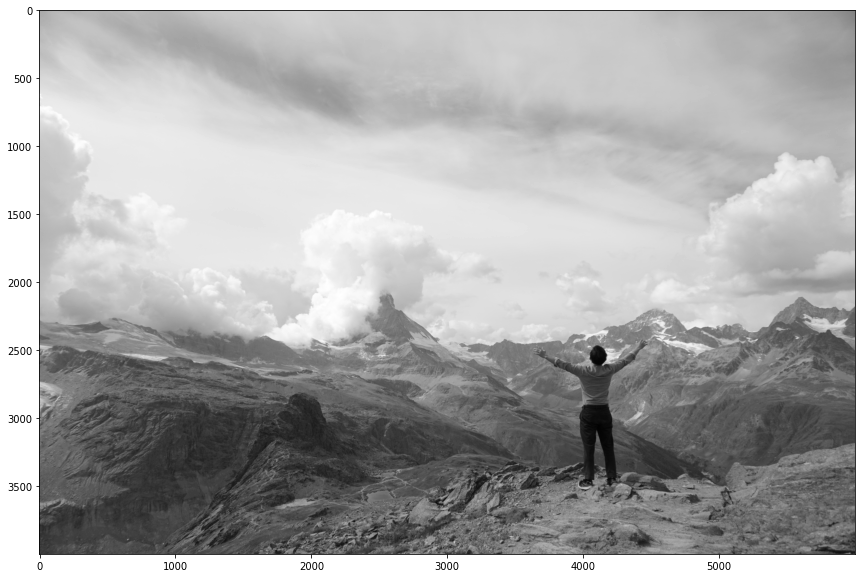

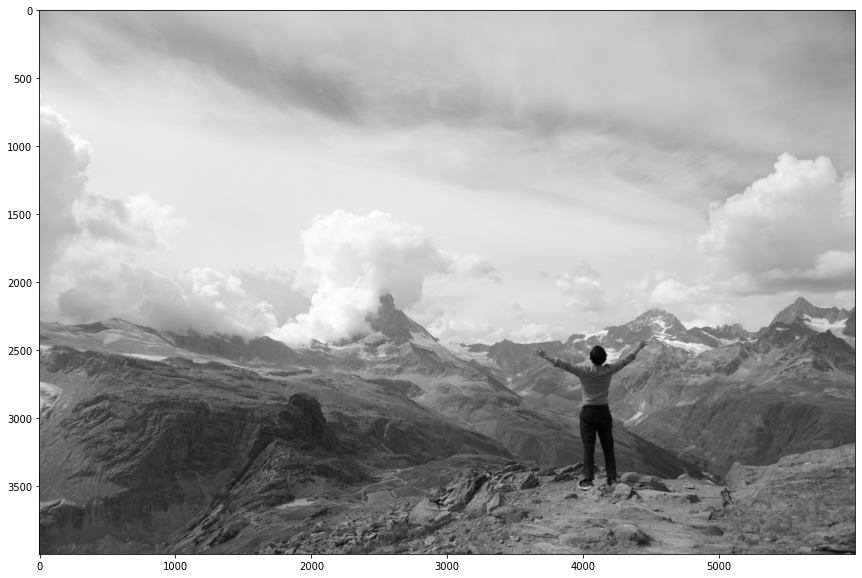

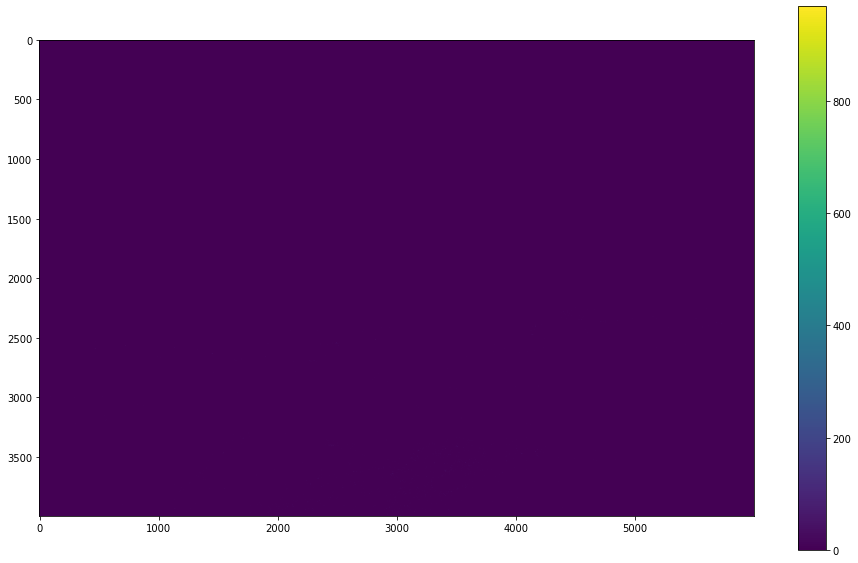

In [55]:
# visualize the corners

corner_map = np.zeros(img.shape[0:2], dtype=int)
corner_map[corners[:,1], corners[:,0]] = V

blur = cv2.GaussianBlur(img,(5,5),0.787)

plt.figure(figsize=(16,10))
plt.imshow(blur, cmap='gray')
plt.show()

blur = cv2.GaussianBlur(img,(5,5),1.414)

plt.figure(figsize=(16,10))
plt.imshow(blur, cmap='gray')
plt.show()


plt.figure(figsize=(16,10))
plt.imshow(corner_map)
plt.colorbar()
plt.show()


In [56]:
def ExtractDescriptors(img, corners, delta = 10):

    # extract descriptors
    img_s = cv2.GaussianBlur(img,(5,5), 1.414)
    img = cv2.GaussianBlur(img,(5,5), 0.787)

    
    v0 = img[corners[:,1], corners[:,0]].astype(int) # pixel values of the corner points
    v0_t = v0 + delta
    v0_b = v0 - delta
    v1 = img[corners[:,1]-1, corners[:,0]-1].astype(int)
    v2 = img[corners[:,1]-1, corners[:,0]].astype(int)
    v3 = img[corners[:,1]-1, corners[:,0]+1].astype(int)
    v4 = img[corners[:,1], corners[:,0]-1].astype(int)
    v5 = img[corners[:,1], corners[:,0]+1].astype(int)
    v6 = img[corners[:,1]+1, corners[:,0]-1].astype(int)
    v7 = img[corners[:,1]+1, corners[:,0]].astype(int)
    v8 = img[corners[:,1]+1, corners[:,0]+1].astype(int)

    v0_s = img_s[corners[:,1], corners[:,0]].astype(int)
    v9 = img_s[corners[:,1]-2, corners[:,0]-2].astype(int)
    v10 = img_s[corners[:,1]-2, corners[:,0]].astype(int)
    v11 = img_s[corners[:,1]-2, corners[:,0]+2].astype(int)
    v12 = img_s[corners[:,1], corners[:,0]-2].astype(int)
    v13 = img_s[corners[:,1], corners[:,0]+2].astype(int)
    v14 = img_s[corners[:,1]+2, corners[:,0]-2].astype(int)
    v15 = img_s[corners[:,1]+2, corners[:,0]].astype(int)
    v16 = img_s[corners[:,1]+2, corners[:,0]+2].astype(int)

    v17 = img_s[corners[:,1]-3, corners[:,0]-3].astype(int)
    v18 = img_s[corners[:,1]-3, corners[:,0]].astype(int)
    v19 = img_s[corners[:,1]-3, corners[:,0]+3].astype(int)
    v20 = img_s[corners[:,1], corners[:,0]-3].astype(int)
    v21 = img_s[corners[:,1], corners[:,0]+3].astype(int)
    v22 = img_s[corners[:,1]+3, corners[:,0]-3].astype(int)
    v23 = img_s[corners[:,1]+3, corners[:,0]].astype(int)
    v24 = img_s[corners[:,1]+3, corners[:,0]+3].astype(int)

    b1 = (v1 > v0_b).astype(np.int8) + (v1 > v0_t).astype(np.int8)
    b2 = (v2 > v0_b).astype(np.int8) + (v2 > v0_t).astype(np.int8)
    b3 = (v3 > v0_b).astype(np.int8) + (v3 > v0_t).astype(np.int8)
    b4 = (v4 > v0_b).astype(np.int8) + (v4 > v0_t).astype(np.int8)
    b5 = (v5 > v0_b).astype(np.int8) + (v5 > v0_t).astype(np.int8)
    b6 = (v6 > v0_b).astype(np.int8) + (v6 > v0_t).astype(np.int8)
    b7 = (v7 > v0_b).astype(np.int8) + (v7 > v0_t).astype(np.int8)
    b8 = (v8 > v0_b).astype(np.int8) + (v8 > v0_t).astype(np.int8)
    b9 = (v9 > v0_s - delta).astype(np.int8) + (v9 > v0_s + delta).astype(np.int8)
    b10 = (v10 > v0_s - delta).astype(np.int8) + (v10 > v0_s + delta).astype(np.int8)
    b11 = (v11 > v0_s - delta).astype(np.int8) + (v11 > v0_s + delta).astype(np.int8)
    b12 = (v12 > v0_s - delta).astype(np.int8) + (v12 > v0_s + delta).astype(np.int8)
    b13 = (v13 > v0_s - delta).astype(np.int8) + (v13 > v0_s + delta).astype(np.int8)
    b14 = (v14 > v0_s - delta).astype(np.int8) + (v14 > v0_s + delta).astype(np.int8)
    b15 = (v15 > v0_s - delta).astype(np.int8) + (v15 > v0_s + delta).astype(np.int8)
    b16 = (v16 > v0_s - delta).astype(np.int8) + (v16 > v0_s + delta).astype(np.int8)
    b17 = (v17 > v0_s - delta).astype(np.int8) + (v17 > v0_s + delta).astype(np.int8)
    b18 = (v18 > v0_s - delta).astype(np.int8) + (v18 > v0_s + delta).astype(np.int8)
    b19 = (v19 > v0_s - delta).astype(np.int8) + (v19 > v0_s + delta).astype(np.int8)
    b20 = (v20 > v0_s - delta).astype(np.int8) + (v20 > v0_s + delta).astype(np.int8)
    b21 = (v21 > v0_s - delta).astype(np.int8) + (v21 > v0_s + delta).astype(np.int8)
    b22 = (v22 > v0_s - delta).astype(np.int8) + (v22 > v0_s + delta).astype(np.int8)
    b23 = (v23 > v0_s - delta).astype(np.int8) + (v23 > v0_s + delta).astype(np.int8)
    b24 = (v24 > v0_s - delta).astype(np.int8) + (v24 > v0_s + delta).astype(np.int8)

    desc = np.vstack((b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16, b17, b18, b19, b20, b21, b22, b23, b24)).T

    return desc

In [57]:
img2 = cv2.cvtColor(cv2.imread('mountain2.jpg'), cv2.COLOR_BGR2GRAY)
corners2, V2 = DetectFASTCorner(img2, 20)
print(corners2.shape)
print(corners.shape)

desc1 = ExtractDescriptors(img, corners)
desc2 = ExtractDescriptors(img2, corners2)


(3472, 2)
(2834, 2)


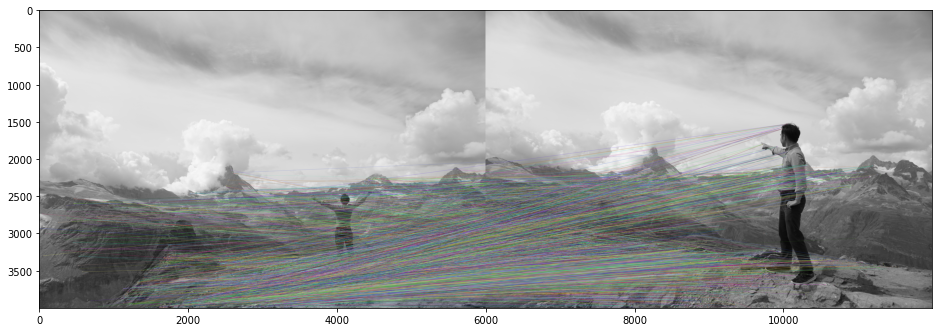

In [58]:
# Matching 

matching1to2 = np.zeros((desc1.shape[0],2), dtype=int)
matchingCost = np.zeros(desc1.shape[0], dtype=int)
max_val = 2*24
for i in range(0, desc1.shape[0]):
        
    dist = np.sum(np.absolute(desc2 - desc1[i,:]), axis = 1)
    
    #print('min cost: %d, matches: %d' %(matchingCost[i],np.ravel(min_idx).shape[0]))
    min_idx = np.where(dist == np.amin(dist))
    matchingCost[i] = dist[np.ravel(min_idx)[0]]
    
    dist[np.ravel(min_idx)[0]] = max_val
    min_idx2 = np.where(dist == np.amin(dist))
    matching1to2[i,0] = np.ravel(min_idx)[0] # minimum
    matching1to2[i,1] = np.ravel(min_idx2)[0] # 2nd minimum
    
    # implement: ratio matching, symmetic constraint, and thresholding by matching cost
    
    
    
# display correspondences 
    
keypoints1 = []
for i in range(0, corners.shape[0]):
    keypoints1.append(cv2.KeyPoint(corners[i,0], corners[i,1], 1))
    
keypoints2 = []
for i in range(0, corners2.shape[0]):
    keypoints2.append(cv2.KeyPoint(corners2[i,0], corners2[i,1], 1))
    
matches_draw = []
for i in range(0, matching1to2.shape[0]):
    matches_draw.append(cv2.DMatch(i, matching1to2[i,0], matchingCost[i]))

match_img = cv2.drawMatches(
    img, keypoints1,
    img2, keypoints2,
    matches_draw[0:-1], outImg=None)
    

plt.figure(figsize=(16,10))
plt.imshow(match_img)    
plt.show()


In [59]:
def FindHomography(pts1, pts2):
    
    n = pts1.shape[0]
    A = np.zeros((0, 9), dtype=float)
    for i in range(0, n):
        
        x = pts1[i, 0]
        y = pts1[i, 1]
        
        xp = pts2[i, 0]
        yp = pts2[i, 1]
        
        a1 = np.array([[-x, -y, -1, 0.0, 0.0, 0.0, xp*x, xp*y, xp], [0, 0, 0, -x, -y, -1, yp*x, yp*y, yp]])
        A = np.vstack((A, a1))
    
    #print(A)
    u, d, vh = np.linalg.svd(A)
    
    #print(v)
    H = vh[-1]
    H = H/H[-1]
    
    return H
    

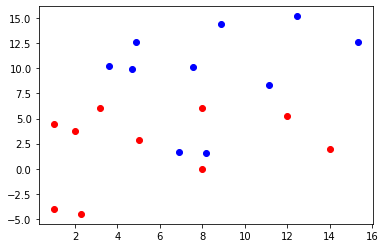

The transform applied to the 3D points
[[ 0.83149158 -0.38268343  4.5       ]
 [ 0.38268343  1.01626749  5.3       ]
 [ 0.          0.          1.        ]]
The estimated transform
[ 8.31629901e-01 -3.88931675e-01  4.51629285e+00  3.84604764e-01
  1.01204002e+00  5.27998364e+00  2.84416706e-04 -7.18528330e-04
  1.00000000e+00]


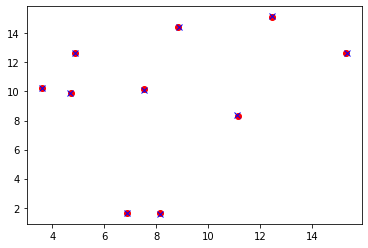

In [60]:
# test the funtion FindHomography

# the homography matrix 
scale_x = 0.9
scale_y = 1.1
tx = 4.5
ty = 5.3
true_H = np.array([[scale_x*np.cos(np.pi/8), -np.sin(np.pi/8), tx], [np.sin(np.pi/8), scale_y*np.cos(np.pi/8), ty], [0, 0, 1]])

# input points
pts1 = np.array([[1, -4], [1, 4.5], [2, 3.8], [2.3, -4.5], [5, 2.9], [8, 6], [12, 5.2], [14, 2], [3.2, 6.0], [8, 0.0]])

# transformed points, noise added
uvw = np.matmul(true_H, np.vstack(((pts1 + (np.random.random(pts1.shape) -0.5)*0.1).T, np.ones((1, pts1.shape[0])))))
pts2 = np.divide(uvw, uvw[-1,:])[0:2,:].T

plt.plot(pts1[:,0],pts1[:,1], 'ro')
plt.plot(pts2[:,0],pts2[:,1], 'bo')
plt.show()


H = FindHomography(pts1, pts2)

uvw = np.matmul(np.reshape(H, (3,3)), np.vstack((pts1.T, np.ones((1, pts1.shape[0])))))
pts2p = np.divide(uvw, uvw[-1,:])[0:2,:].T

print('The transform applied to the 3D points')
print(true_H)
print('The estimated transform')
print(H)


plt.plot(pts2p[:,0],pts2p[:,1], 'ro')
plt.plot(pts2[:,0],pts2[:,1], 'bx')
plt.show()
